In [1]:
import numpy as np
import pandas as pd
import pyflux as pf
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/sunspot.year.csv')

In [3]:
data.index = data['time'].values

In [4]:
data.head()
data['sunspot.year'] = data['value'].values
data.head()

,Unnamed: 0,time,value,sunspot.year
1700,1,1700,5.0,5.0
1701,2,1701,11.0,11.0
1702,3,1702,16.0,16.0
1703,4,1703,23.0,23.0
1704,5,1704,36.0,36.0


In [5]:
data['sunspot.year']

1700      5.0
1701     11.0
1702     16.0
1703     23.0
1704     36.0
1705     58.0
1706     29.0
1707     20.0
1708     10.0
1709      8.0
1710      3.0
1711      0.0
1712      0.0
1713      2.0
1714     11.0
1715     27.0
1716     47.0
1717     63.0
1718     60.0
1719     39.0
1720     28.0
1721     26.0
1722     22.0
1723     11.0
1724     21.0
1725     40.0
1726     78.0
1727    122.0
1728    103.0
1729     73.0
        ...  
1959    159.0
1960    112.3
1961     53.9
1962     37.5
1963     27.9
1964     10.2
1965     15.1
1966     47.0
1967     93.8
1968    105.9
1969    105.5
1970    104.5
1971     66.6
1972     68.9
1973     38.0
1974     34.5
1975     15.5
1976     12.6
1977     27.5
1978     92.5
1979    155.4
1980    154.7
1981    140.5
1982    115.9
1983     66.6
1984     45.9
1985     17.9
1986     13.4
1987     29.2
1988    100.2
Name: sunspot.year, Length: 289, dtype: float64

Text(0.5, 1.0, 'Yearly Sunspot Data')

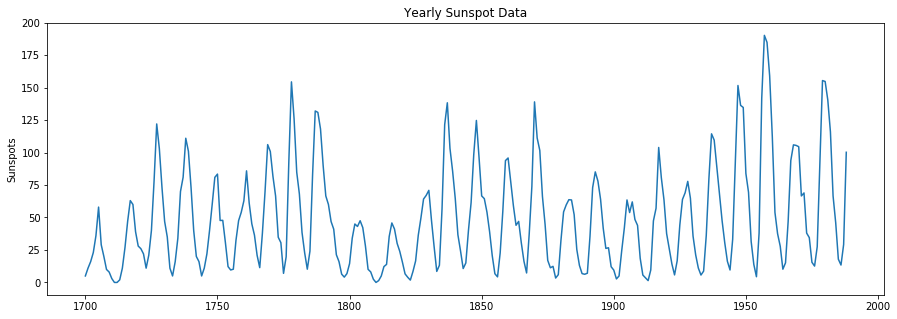

In [6]:
plt.figure(figsize=(15, 5))
plt.plot(data.index, data['sunspot.year'])
plt.ylabel('Sunspots')
plt.title('Yearly Sunspot Data')

In [7]:
model = pf.ARIMA(data=data, ar=4, ma=4, target='sunspot.year', family=pf.Normal())

In [8]:
x = model.fit('MLE')
x.summary()

Normal ARIMA(4,0,4)                                                                                       
======================================================= ==================================================
Dependent Variable: sunspot.year                        Method: MLE                                       
Start Date: 1704                                        Log Likelihood: -1180.5324                        
End Date: 1988                                          AIC: 2381.0648                                    
Number of observations: 285                             BIC: 2417.5897                                    
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Constant                                 2.6393     1.0939     2.4127   0.0158   (0.4952 | 4.7833)        
AR(1)                                

c:\users\neko9\desk\dev\.venv\lib\site-packages\pyflux\latent_variables.py:290: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  plt.plot(x,mlab.normpdf(x,self.z_list[z-1].value,self.z_list[z-1].std),label=self.z_list[z-1].method + ' estimate of ' + self.z_list[z-1].name)
c:\users\neko9\desk\dev\.venv\lib\site-packages\pyflux\latent_variables.py:290: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  plt.plot(x,mlab.normpdf(x,self.z_list[z-1].value,self.z_list[z-1].std),label=self.z_list[z-1].method + ' estimate of ' + self.z_list[z-1].name)
c:\users\neko9\desk\dev\.venv\lib\site-packages\pyflux\latent_variables.py:290: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  plt.plot(x,mlab.normpdf(x,self.z_list[z-1].value,self.z_list[z-1].std),label=self.z_list[z-1].method + ' estimate of ' + self.z_list[z-1].name)
c:\users\neko9\desk\dev\.venv\lib\site-packages\pyflux\latent_variables.py:290: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  plt.plot(x,mlab.normpdf(x,self.z_lis

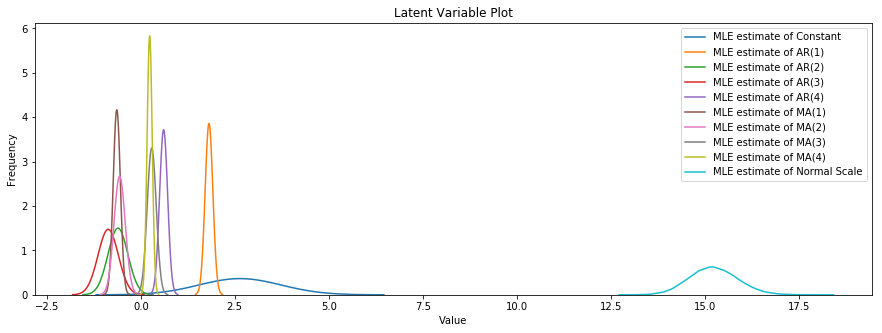

In [9]:
model.plot_z(figsize=(15, 5))

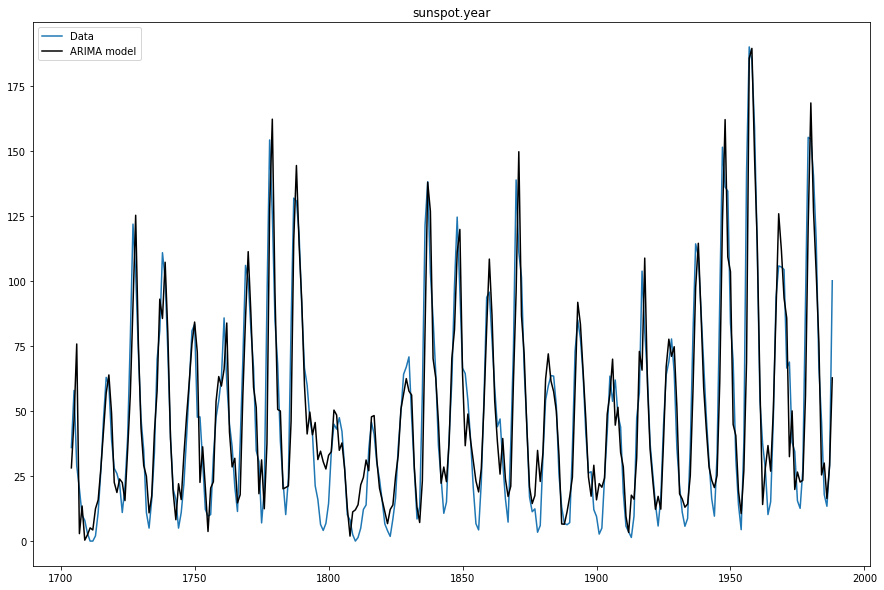

In [10]:
model.plot_fit(figsize=(15, 10))

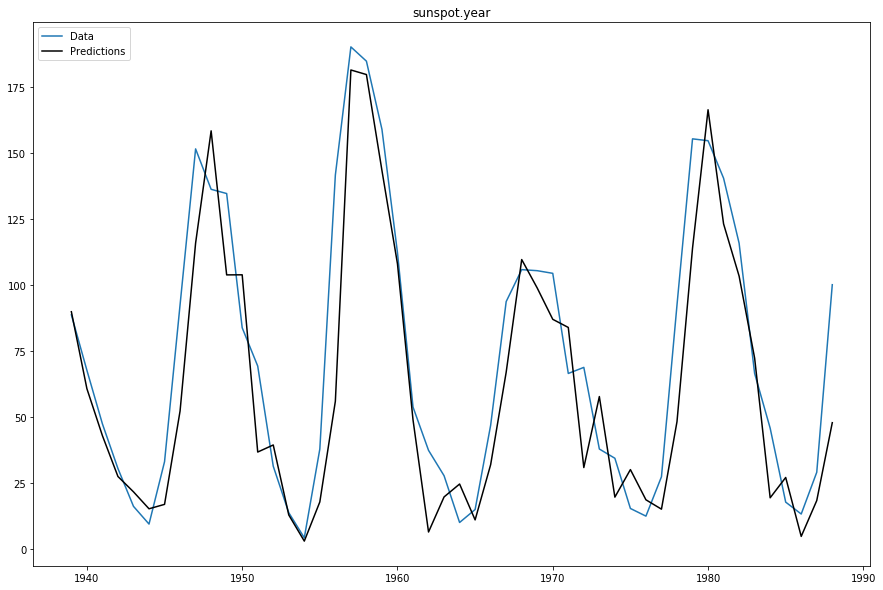

In [11]:
model.plot_predict_is(h=50, figsize=(15, 10))

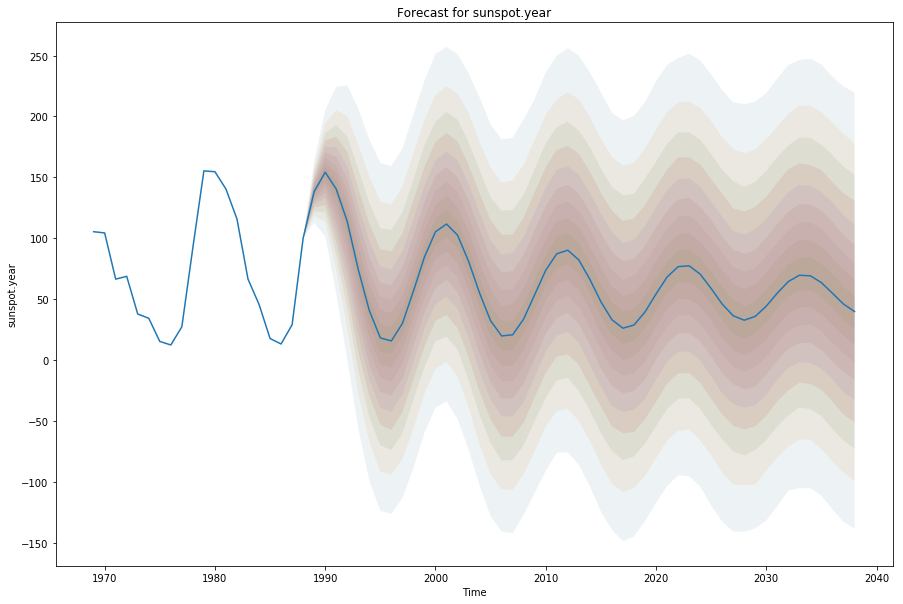

In [12]:
model.plot_predict(h=50, past_values=20, figsize=(15, 10))